In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data_set/sonar_data.data', header=None)

In [3]:
df.columns = ['feature0','feature1','feature02','feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10',
              'feature11','feature12','feature13','feature14','feature15','feature16','feature17','feature18','feature19','feature20',
              'feature21','feature22','feature23','feature24','feature25','feature26','feature27','feature28','feature29','feature30'
             ,'feature31','feature32','feature33','feature34','feature35','feature36','feature37','feature38','feature39','feature40'
             ,'feature41','feature42','feature43','feature44','feature45','feature46','feature47','feature48','feature49','feature50'
             ,'feature51','feature52','feature53','feature54','feature55','feature56','feature57','feature58','feature59','class']

In [4]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['class'].values)
X = df.iloc[:, 0:60].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA

from sklearn.pipeline import make_pipeline
pipe_svm = make_pipeline(StandardScaler(),KernelPCA(),
                         SVC(kernel='rbf', C=100, random_state=1))##linear
pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('Test Accuracy: %.3f' % pipe_svm.score(X_test, y_test))

Test Accuracy: 0.938


In [7]:
pipe_svm1 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=100, random_state=1))##linear
pipe_svm1.fit(X_train, y_train)
y_pred1 = pipe_svm1.predict(X_test)
print('Test Accuracy: %.3f' % pipe_svm1.score(X_test, y_test))

Test Accuracy: 0.938


In [8]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_svm.fit(X_train[train], y_train[train])
    score = pipe_svm.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))

Fold:  1, Class dist.: [85 73], Acc: 0.833
Fold:  2, Class dist.: [85 73], Acc: 0.889
Fold:  3, Class dist.: [84 74], Acc: 0.944
Fold:  4, Class dist.: [84 74], Acc: 0.722
Fold:  5, Class dist.: [84 74], Acc: 0.833
Fold:  6, Class dist.: [84 74], Acc: 0.833
Fold:  7, Class dist.: [85 74], Acc: 0.941
Fold:  8, Class dist.: [85 74], Acc: 0.882
Fold:  9, Class dist.: [85 74], Acc: 0.882
Fold: 10, Class dist.: [85 74], Acc: 1.000


In [9]:
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.876 +/- 0.073


In [10]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True).split(X_train, y_train)
scores1 = []
for k, (train, test) in enumerate(kfold):
    pipe_svm1.fit(X_train[train], y_train[train])
    score1 = pipe_svm1.score(X_train[test], y_train[test])
    scores1.append(score1)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score1))

Fold:  1, Class dist.: [85 73], Acc: 0.833
Fold:  2, Class dist.: [85 73], Acc: 0.889
Fold:  3, Class dist.: [84 74], Acc: 0.944
Fold:  4, Class dist.: [84 74], Acc: 0.722
Fold:  5, Class dist.: [84 74], Acc: 0.833
Fold:  6, Class dist.: [84 74], Acc: 0.833
Fold:  7, Class dist.: [85 74], Acc: 0.941
Fold:  8, Class dist.: [85 74], Acc: 0.882
Fold:  9, Class dist.: [85 74], Acc: 0.882
Fold: 10, Class dist.: [85 74], Acc: 1.000


In [11]:
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores1), np.std(scores1)))


CV accuracy: 0.876 +/- 0.073


In [12]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
pipe_svm = make_pipeline(StandardScaler(),KernelPCA(),
                         SVC(kernel='rbf', C=100, random_state=1))##linear
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_svm, X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=15, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

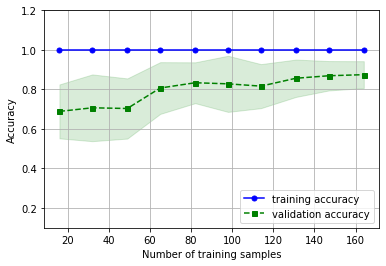

In [13]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', 
             markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.1, 1.2])
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1,1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']}, {'svc__C': param_range,
                                                                   'svc__gamma': param_range,
                                                                   'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy',cv=15, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8742424242424242
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [15]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.906


In [16]:
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=15)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.874 +/- 0.082


In [17]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                      param_grid=[{'max_depth': [1, 2, 3,4, 5, 6, 7, None]}],scoring='accuracy',cv=2)
scores = cross_val_score(gs, X_train, y_train,scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.687 +/- 0.059


In [18]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[13  4]
 [ 4 11]]


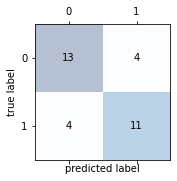

In [19]:
ig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [20]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))

print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))

print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.733
Recall: 0.733
F1: 0.733


In [21]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,
                  scoring=scorer,cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8793880534670009
{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [22]:
scores_ = cross_val_score(estimator=pipe_svc,
                             X=X_train,
                             y=y_train,
                             cv=15,
                             scoring='roc_auc')
print("ROC AUC: %0.2f (+/- %0.2f)"% (scores.mean(), scores.std()))

ROC AUC: 0.69 (+/- 0.06)


In [23]:
##scores_